#### Coletando dados dos Estados Brasileiros

In [1]:
# importando biblioteca necessária
import pandas as pd

In [2]:
# lendo arquivo
estados = pd.read_csv('estados_brasileiros.csv', sep=';' , encoding='latin-1')

In [3]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,NaN
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,NaN
4,5,Bahia,ba,Brasil


#### Coletando dados de Clientes

In [4]:
# lendo arquivo
clientes = pd.read_excel('amostra_dados_clientes.xlsx')

In [5]:
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


#### Coletando dados de Idade dos Clientes

In [6]:
idade = pd.read_csv('idade_clientes.csv', sep=';' , encoding='latin-1')

In [7]:
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


#### Preparação dos Dados
Analisando as variáveis de base de dados

In [8]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  225 non-null    int64  
 1   peso        222 non-null    float64
 2   colesterol  225 non-null    int64  
 3   genero      225 non-null    object 
 4   id_estado   225 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.9+ KB


In [9]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,225.000000,222.000000,225.000000,225.000000
mean,113.000000,142.315315,168.733333,13.711111
std,65.096083,31.198817,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,170.000000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [10]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          22 non-null     object
dtypes: int64(1), object(3)
memory usage: 996.0+ bytes


In [11]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [12]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


#### Analisando dados ausentes

In [13]:
# verificando valores ausentes/nulos na base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [14]:
clientes.isna().sum()

id_cliente    0
peso          3
colesterol    0
genero        0
id_estado     0
dtype: int64

In [15]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [16]:
# verificando os registros com valores nulos
estados.loc[estados['pais'].isnull()]

,id_estado,estado,sigla_estado,pais
1,2,Alagoas,al,NaN
3,4,Amazonas,am,NaN
7,8,Espírito Santo,es,NaN
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


In [17]:
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
32,33,NaN,188,Masculino,22
41,42,NaN,177,Masculino,20
87,88,NaN,168,Feminino,12


#### Alterando os valores nulos

In [18]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,225.000000,222.000000,225.000000,225.000000
mean,113.000000,142.315315,168.733333,13.711111
std,65.096083,31.198817,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,170.000000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [19]:
# realizando a media e a mediana da variavel peso
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [20]:
# verificando valores
print(f"O valor da média dos pesos é:{media}, o valor de mediana é:{mediana}")

O valor da média dos pesos é:142.3153153153153, o valor de mediana é:138.5


In [21]:
# fazendo arredondamento da variavel media
round(media,2)

142.32

In [22]:
# preencher valores ausentes pela média
clientes.peso.fillna(round(media,2), inplace=True)

In [23]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [24]:
clientes.count()

id_cliente    225
peso          225
colesterol    225
genero        225
id_estado     225
dtype: int64

In [25]:
print(estados.pais.value_counts())

pais
Brasil    22
Name: count, dtype: int64


In [26]:
estados.fillna('Brasil', inplace=True)

In [27]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [28]:
estados

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil
7,8,Espírito Santo,es,Brasil
8,9,Goiás,go,Brasil
9,10,Maranhão,ma,Brasil


#### Analisando distribuição dos dados

In [29]:
# importando biblioteca necessária para gerar gráficos
import matplotlib.pyplot as plt

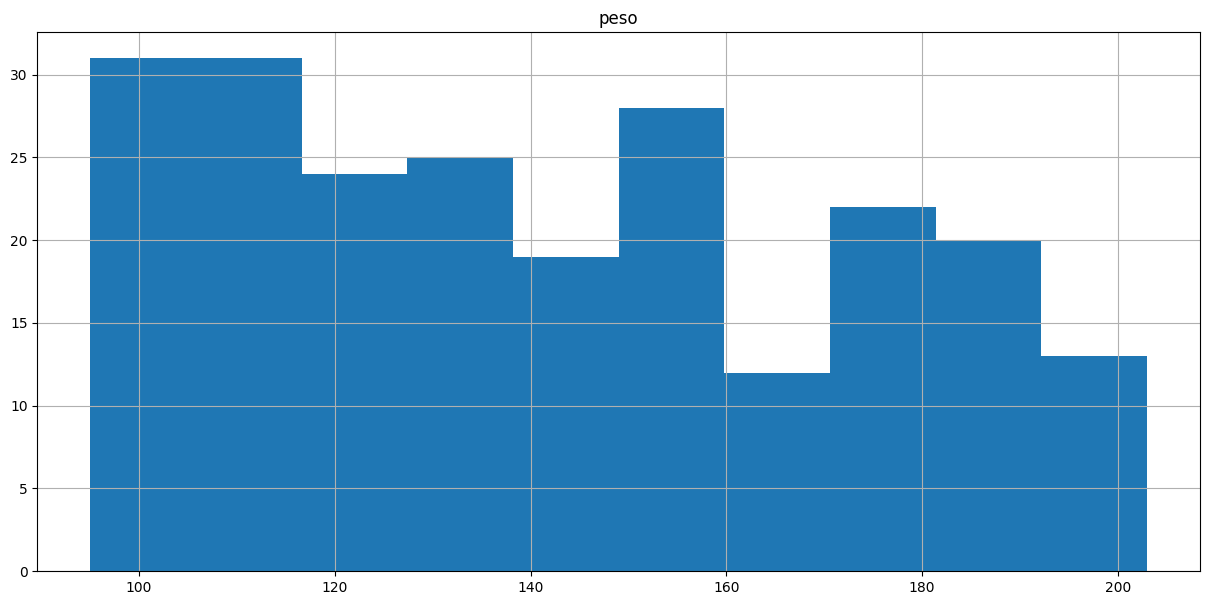

In [30]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

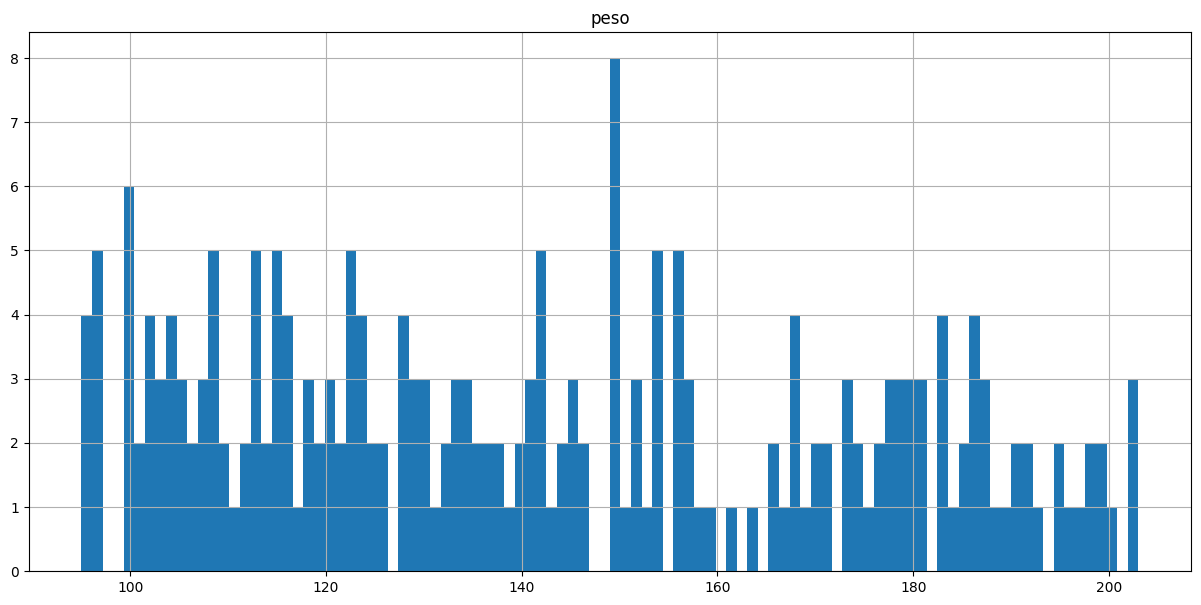

In [31]:
clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

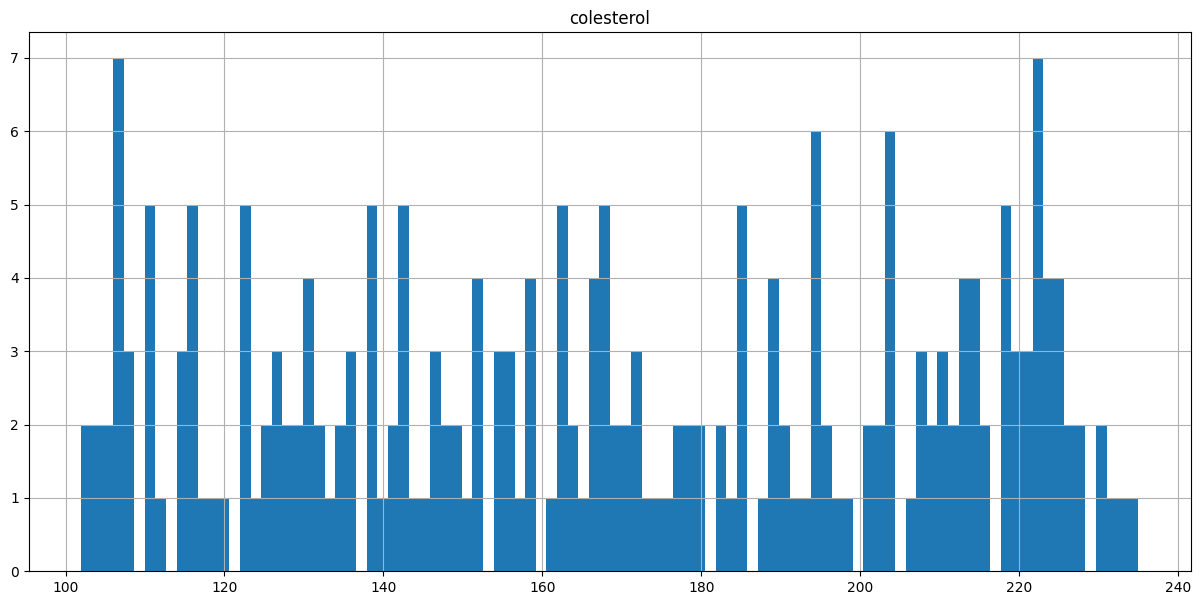

In [32]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)
plt.show()

In [33]:
# criando um identificador para variavel genero
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [34]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1
221,222,116.0,138,Feminino,15,0
222,223,144.0,169,Feminino,18,0
223,224,102.0,116,Masculino,6,1


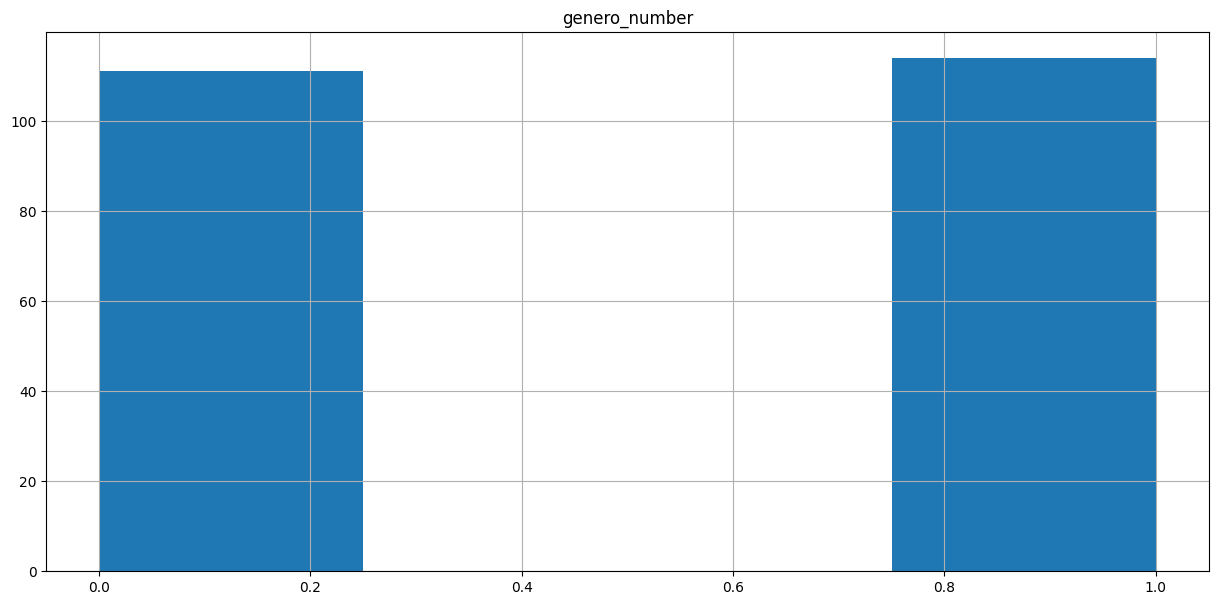

In [35]:
clientes.hist(column='genero_number', figsize=(15,7), bins=4)
plt.show()

#### Junções entre os dados coletados
Estados e Clientes

In [36]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [37]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [38]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil


In [39]:
# realizar a junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [40]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


In [41]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
221,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
222,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
223,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


#### Organizando a base de dados

In [42]:
# alterando nome das colunas
base_completa.rename(columns={'id_cliente':'cod_cliente', 'genero_number':'cod_genero'},inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


In [43]:
# alterando as linhas da variável sigla_estado
base_completa.sigla_estado.str.upper()

0      RR
9      DF
21     AM
32     SC
39     SE
       ..
167    RN
126    PB
196    PI
77     CE
20     DF
Name: sigla_estado, Length: 225, dtype: object

In [44]:
# inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

#### Alterando disposição das colunas do arquivo de dados

In [45]:
base_completa[['cod_cliente','genero','idade','peso','colesterol','id_estado','estado','sigla_estado','pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
9,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
21,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
32,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
39,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil
126,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil
196,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil
77,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil


In [46]:
base_completa = base_completa[['cod_cliente','genero','idade','peso','colesterol','id_estado','estado','sigla_estado','pais']].reset_index(drop=True)

In [47]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil
221,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil
222,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil
223,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil


#### Análise de dados
Nesta análise realizar agrupamento de pessoas baseado no colesterol, peso e idade.

#### Aplicando método do cotovelo
Visualizar e identificar o número de clusters necessário para realizar o agrupamento

In [48]:
# importando biblioteca necessária
from sklearn.cluster import KMeans

In [49]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters= k)
        kmeans.fit(X = dados_cliente)
        wcss.append(kmeans.inertia_)
    return wcss  

In [50]:
dados_cliente = base_completa[['peso','colesterol','idade']]
dados_cliente

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62
3,140.0,167,55
4,130.0,158,44
...,...,...,...
220,180.0,219,33
221,116.0,138,38
222,144.0,169,24
223,102.0,116,31


In [51]:
wcss_clientes = calcular_wcss(dados_cliente)

C:\Users\Luiz Felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Luiz Felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [52]:
# visualizando os dados obtidos do wcss
for i in range(len(wcss_clientes)):
    print(f'O cluster {i} possui valor de wcss de: {wcss_clientes[i]}')

O cluster 0 possui valor de wcss de: 615755.6435484445
O cluster 1 possui valor de wcss de: 189259.39756939263
O cluster 2 possui valor de wcss de: 110985.62659521376
O cluster 3 possui valor de wcss de: 85993.49644839711
O cluster 4 possui valor de wcss de: 72583.14346566841
O cluster 5 possui valor de wcss de: 61665.97491956275
O cluster 6 possui valor de wcss de: 49509.60070120371
O cluster 7 possui valor de wcss de: 45383.0578943647
O cluster 8 possui valor de wcss de: 41044.223590640395
O cluster 9 possui valor de wcss de: 33089.7430711871


#### Visualizando o gráfico de cotovelo

In [53]:
import plotly.express as px             # criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go       # criação e concatenação de gráficos

In [54]:
grafico_wcss = px.line(x= range(1,11),
                       y= wcss_clientes
                        )
fig = go.Figure(grafico_wcss)

fig.update_layout(title = 'calculando o wcss',
                  xaxis_title = 'número de clusters',
                  yaxis_title = 'valor do wcss',
                  template = 'plotly_white'
                  )

fig.show()

In [55]:
kmeans_clientes = KMeans(n_clusters=3, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [56]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,2
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2
...,...,...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil,0
221,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil,1
222,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil,2
223,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil,1


#### Calculando os centroides de cada cluster

In [57]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[181.88235294, 216.33823529,  44.54411765],
       [109.79268293, 125.15853659,  42.63414634],
       [141.99946667, 173.21333333,  41.89333333]])

Aqui temos os centroides de 3 clusters de acordo com os atributos.
Nesse exemplo vemos os centroides de 'peso', 'colesterol', 'idade' respectivamente

In [58]:
grafico = px.scatter(x=base_completa['peso'],
                     y=base_completa['colesterol'],
                     color=base_completa['cluster'])

grafico_centroide = px.scatter(x=centroides_clusters[:,0], y=centroides_clusters[:,1], size = [7,7,7])
grafico_final_petala = go.Figure(data=grafico.data + grafico_centroide.data)
grafico_final_petala.show()

#### Visualizando e alterando layout do grafico

In [59]:
grafico = px.scatter(x=base_completa['peso'],
                     y=base_completa['colesterol'],
                     color=base_completa['cluster'])

fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                  xaxis_title='Colesterol',
                  yaxis_title='peso'
                  )
fig.show()

#### Criando funções para gerar gráficos

In [60]:
def plotar_graficos(x,y,xlabel,y_label):
    grafico = px.scatter(x = x,
                         y = y,
                         color= base_completa['cluster']
                         )
    fig = go.Figure(grafico)
    fig.update_layout(title='Análise de Clusters',
                      xaxis_title = xlabel,
                      yaxis_title = y_label,
                      )
    
    fig.show()

In [61]:
plotar_graficos(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [62]:
plotar_graficos(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [63]:
plotar_graficos(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

#### Segmentando os clientes baseado na análise dos clusters
Vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam agrupamento.

Agrupamento em 3 tipos:

Alto risco: Peso e colesterol 

Baixo risoc: Baixo peso e colesterol baixo

Moderado risco: Peso e colesterol medianos

In [64]:
x = 'colesterol'
y = 'peso'

plotar_graficos(base_completa[x], base_completa[y], x,y)

In [65]:
clusters_cliente = base_completa

In [66]:
# segmentando os clientes baseado na análise dos clusters
clusters_cliente.loc[clusters_cliente['cluster'] == 2, 'nome_cluster'] = 'Alto Risco'
clusters_cliente.loc[clusters_cliente['cluster'] == 1, 'nome_cluster'] = 'Baixo Risco'
clusters_cliente.loc[clusters_cliente['cluster'] == 0, 'nome_cluster'] = 'Risco Moderado'

In [67]:
clusters_cliente

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1,Baixo Risco
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,2,Alto Risco
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil,0,Risco Moderado
221,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil,1,Baixo Risco
222,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil,2,Alto Risco
223,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil,1,Baixo Risco


#### Análise dos clusters criados

In [68]:
# verifica os valores de idade por cluster
clusters_cliente.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,75.0,41.893333,14.699304,16.0,30.50,42.0,53.00,70.0
Baixo Risco,82.0,42.634146,15.442056,17.0,29.00,42.5,54.75,70.0
Risco Moderado,68.0,44.544118,15.977067,16.0,31.75,47.0,58.50,69.0


In [69]:
# verifica os valores de estado por cluster
clusters_cliente.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,75,26,Roraima,5
Baixo Risco,82,26,Amazonas,8
Risco Moderado,68,24,Distrito Federal,6


In [70]:
clusters_cliente.query('nome_cluster == "Alto Risco" & estado == "Mato Grosso"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
23,24,Feminino,34,140.0,168,11,Mato Grosso,MT,Brasil,2,Alto Risco
69,70,Feminino,49,137.0,166,11,Mato Grosso,MT,Brasil,2,Alto Risco


In [71]:
clusters_cliente.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%     50%  \
nome_cluster   genero                                                           
Alto Risco     Feminino    44.0  142.825455  10.115751  124.0  134.75  142.00   
               Masculino   31.0  140.827097  10.087216  124.0  130.50  142.32   
Baixo Risco    Feminino    39.0  111.153846   8.692218   96.0  106.00  112.00   
               Masculino   43.0  108.558140   8.511343   95.0  102.00  106.00   
Risco Moderado Feminino    28.0  183.571429  10.318730  161.0  178.00  185.00   
               Masculino   40.0  180.700000  11.688697  159.0  172.50  179.00   

                             75%    max  
nome_cluster   genero                    
Alto Risco     Feminino   153.25  158.0  
               Masculino  149.50  157.0  
Baixo Risco    Feminino   118.00  126.0  
               Masculino  115.50  124.0  
Risco Moderado Feminino   191.00  203.0  
               Masculino  187.25  203.0

#### Exportando dados

In [72]:
clusters_cliente.to_csv('clasificacao_clientes', sep=';', encoding='latin-1')